
# Competition Data Analysis and Model Building with Individual Early Stopping

This notebook performs the following steps on each dataset within `Competition_data`:
1. **Data Loading and Preprocessing**: Load each dataset, handle missing values, and perform feature scaling.
2. **Class Imbalance Handling**: Apply SMOTE to balance the classes.
3. **Model Training and Evaluation**: Tune Random Forest and XGBoost individually, with early stopping for XGBoost, and then apply a stacking ensemble model.
4. **Visualization and Results Saving**: Save predictions for each dataset and visualize evaluation metrics.

## Scoring Metric
The final score is calculated as:
$$\text{Score} = \text{Accuracy} \times 0.3 + \text{Precision} \times 0.4 + \text{F1 Score} \times 0.3$$


In [1]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
import xgboost as xgb  # Importing xgboost explicitly
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")


Processing Competition_data/Dataset_2...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_2: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_35...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:18:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_35: Accuracy=0.775, Precision=0.830, F1 Score=0.743, Score=0.787
Processing Competition_data/Dataset_5...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:19:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_5: Accuracy=0.992, Precision=1.000, F1 Score=0.991, Score=0.995
Processing Competition_data/Dataset_32...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:20:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_32: Accuracy=0.764, Precision=0.809, F1 Score=0.760, Score=0.780
Processing Competition_data/Dataset_4...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:21:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_4: Accuracy=0.974, Precision=0.990, F1 Score=0.975, Score=0.981
Processing Competition_data/Dataset_33...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:21:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_33: Accuracy=0.967, Precision=1.000, F1 Score=0.971, Score=0.981
Processing Competition_data/Dataset_3...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:22:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_3: Accuracy=0.786, Precision=1.000, F1 Score=0.824, Score=0.883
Processing Competition_data/Dataset_34...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:23:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_34: Accuracy=0.778, Precision=0.821, F1 Score=0.767, Score=0.792
Processing Competition_data/Dataset_45...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:23:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_45: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_42...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:24:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_42: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_27...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:24:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_27: Accuracy=0.978, Precision=1.000, F1 Score=0.978, Score=0.987
Processing Competition_data/Dataset_18...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_18: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_20...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:26:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_20: Accuracy=0.946, Precision=0.941, F1 Score=0.941, Score=0.943
Processing Competition_data/Dataset_16...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:26:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_16: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_29...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_29: Accuracy=0.900, Precision=0.964, F1 Score=0.885, Score=0.921
Processing Competition_data/Dataset_11...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:28:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_11: Accuracy=0.895, Precision=0.714, F1 Score=0.833, Score=0.804
Processing Competition_data/Dataset_43...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_43: Accuracy=0.764, Precision=0.809, F1 Score=0.760, Score=0.780
Processing Competition_data/Dataset_44...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_44: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_10...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:30:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_10: Accuracy=0.691, Precision=0.714, F1 Score=0.702, Score=0.704
Processing Competition_data/Dataset_17...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:31:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_17: Accuracy=0.846, Precision=1.000, F1 Score=0.818, Score=0.899
Processing Competition_data/Dataset_28...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:31:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/y1/36krdqms3ylf80qt9dq3mjmm0000gn/T/ipykernel_67973/785449832.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))


Ensemble Model Validation Score for Competition_data/Dataset_28: Accuracy=0.842, Precision=0.868, F1 Score=0.829, Score=0.848
Processing Competition_data/Dataset_21...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:32:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_21: Accuracy=0.900, Precision=0.914, F1 Score=0.901, Score=0.906
Processing Competition_data/Dataset_26...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_26: Accuracy=0.870, Precision=0.913, F1 Score=0.875, Score=0.889
Processing Competition_data/Dataset_19...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:34:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_19: Accuracy=0.964, Precision=0.939, F1 Score=0.968, Score=0.955
Processing Competition_data/Dataset_8...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:34:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_8: Accuracy=0.878, Precision=0.960, F1 Score=0.889, Score=0.914
Processing Competition_data/Dataset_38...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:35:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_38: Accuracy=0.850, Precision=0.929, F1 Score=0.839, Score=0.878
Processing Competition_data/Dataset_6...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:36:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_6: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_31...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_31: Accuracy=0.917, Precision=1.000, F1 Score=0.929, Score=0.954
Processing Competition_data/Dataset_1...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_1: Accuracy=0.833, Precision=0.820, F1 Score=0.826, Score=0.826
Processing Competition_data/Dataset_36...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_36: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_37...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:38:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_37: Accuracy=0.737, Precision=0.786, F1 Score=0.688, Score=0.742
Processing Competition_data/Dataset_7...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_7: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_30...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_30: Accuracy=0.824, Precision=0.852, F1 Score=0.786, Score=0.824
Processing Competition_data/Dataset_39...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_39: Accuracy=0.972, Precision=0.984, F1 Score=0.968, Score=0.976
Processing Competition_data/Dataset_9...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_9: Accuracy=0.867, Precision=0.769, F1 Score=0.833, Score=0.818
Processing Competition_data/Dataset_23...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_23: Accuracy=0.874, Precision=0.921, F1 Score=0.864, Score=0.890
Processing Competition_data/Dataset_24...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:43:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_24: Accuracy=0.684, Precision=0.710, F1 Score=0.645, Score=0.683
Processing Competition_data/Dataset_12...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_12: Accuracy=0.911, Precision=0.941, F1 Score=0.889, Score=0.916
Processing Competition_data/Dataset_15...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:45:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_15: Accuracy=0.840, Precision=0.925, F1 Score=0.822, Score=0.869
Processing Competition_data/Dataset_41...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:46:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_41: Accuracy=0.983, Precision=1.000, F1 Score=0.984, Score=0.990
Processing Competition_data/Dataset_46...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:46:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_46: Accuracy=0.884, Precision=0.941, F1 Score=0.865, Score=0.901
Processing Competition_data/Dataset_48...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:47:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_48: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_14...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_14: Accuracy=0.962, Precision=1.000, F1 Score=0.962, Score=0.977
Processing Competition_data/Dataset_13...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_13: Accuracy=0.942, Precision=1.000, F1 Score=0.941, Score=0.965
Processing Competition_data/Dataset_25...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:49:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_25: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_22...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:50:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_22: Accuracy=0.758, Precision=0.846, F1 Score=0.733, Score=0.786
Processing Competition_data/Dataset_49...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_49: Accuracy=0.966, Precision=0.986, F1 Score=0.965, Score=0.974
Processing Competition_data/Dataset_47...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:51:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_47: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_40...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Validation Score for Competition_data/Dataset_40: Accuracy=0.775, Precision=0.830, F1 Score=0.743, Score=0.787


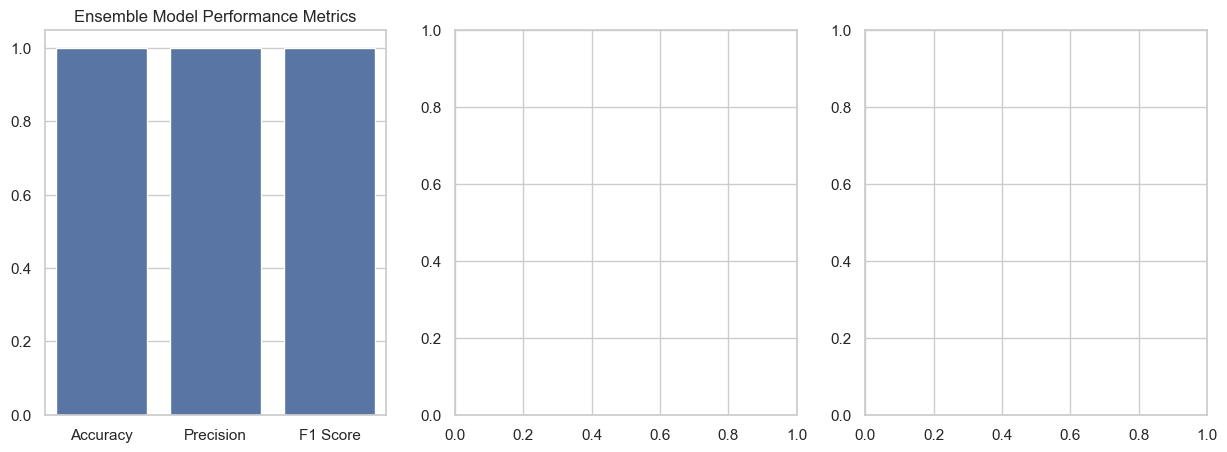

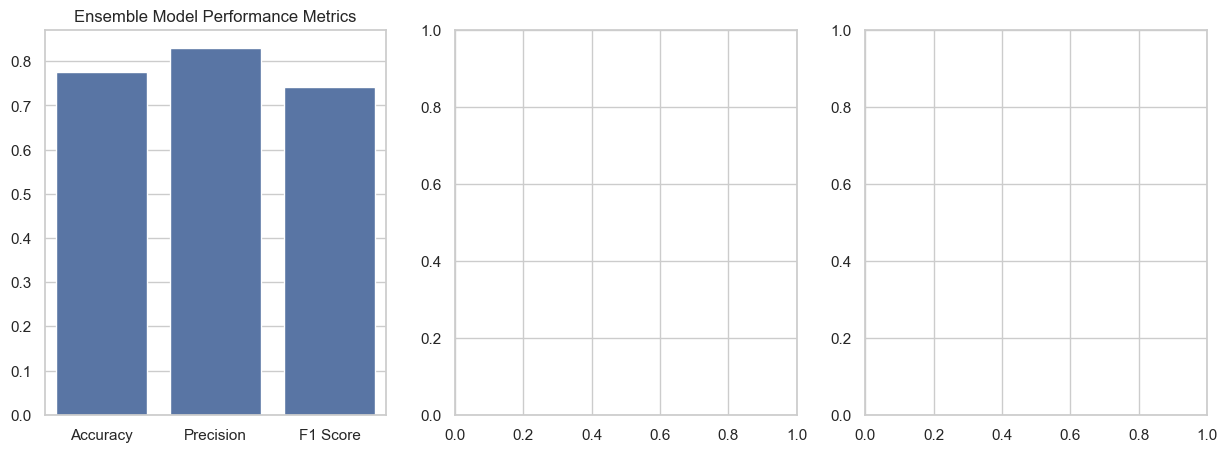

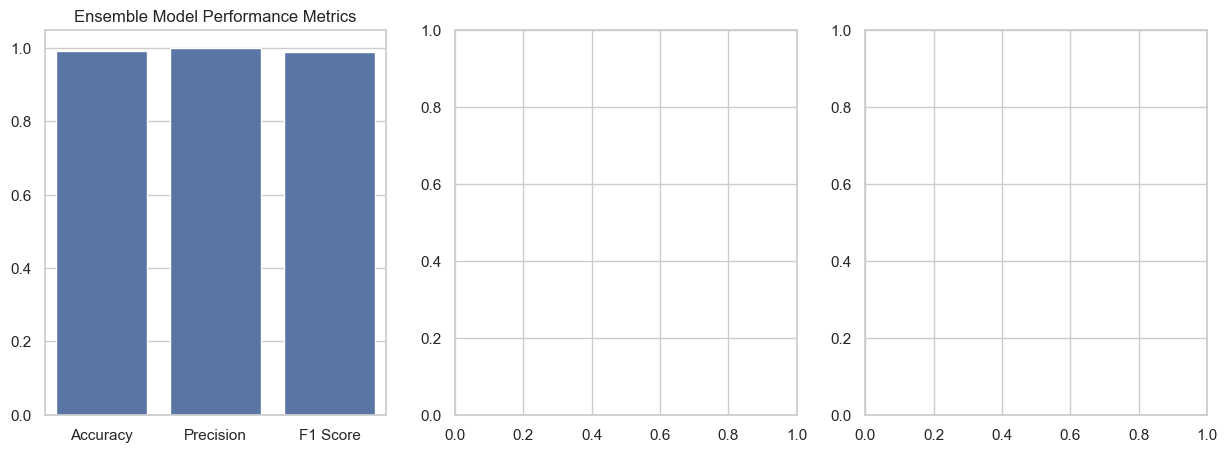

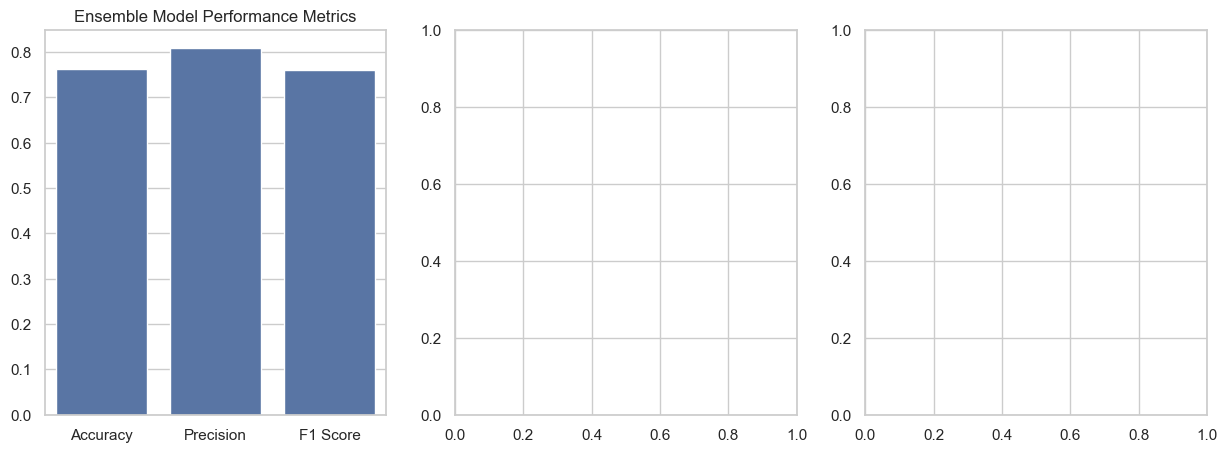

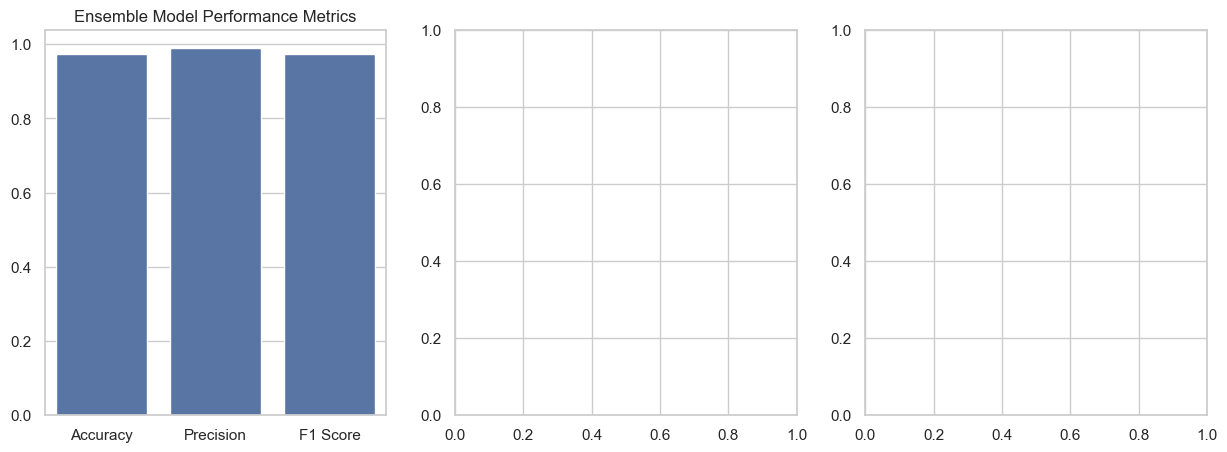

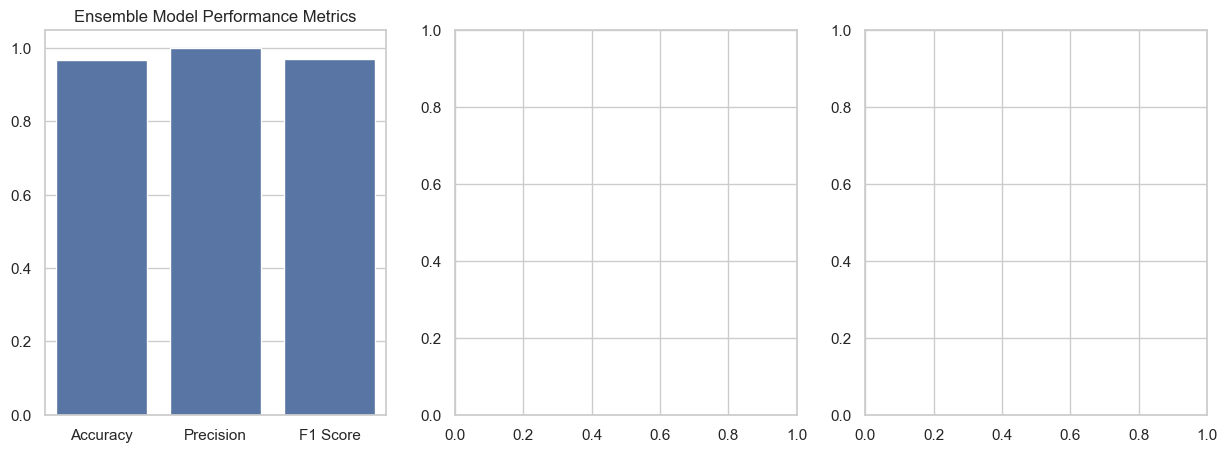

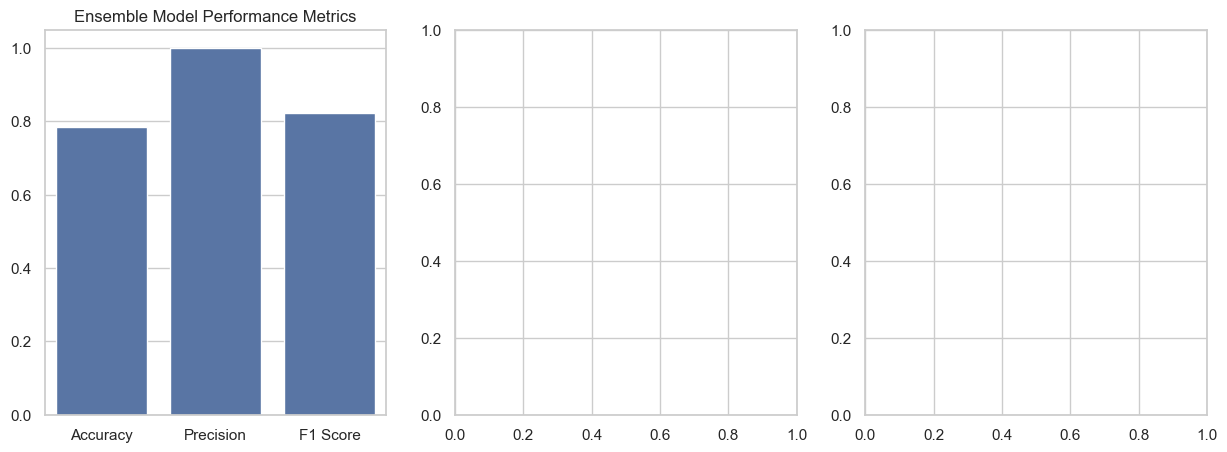

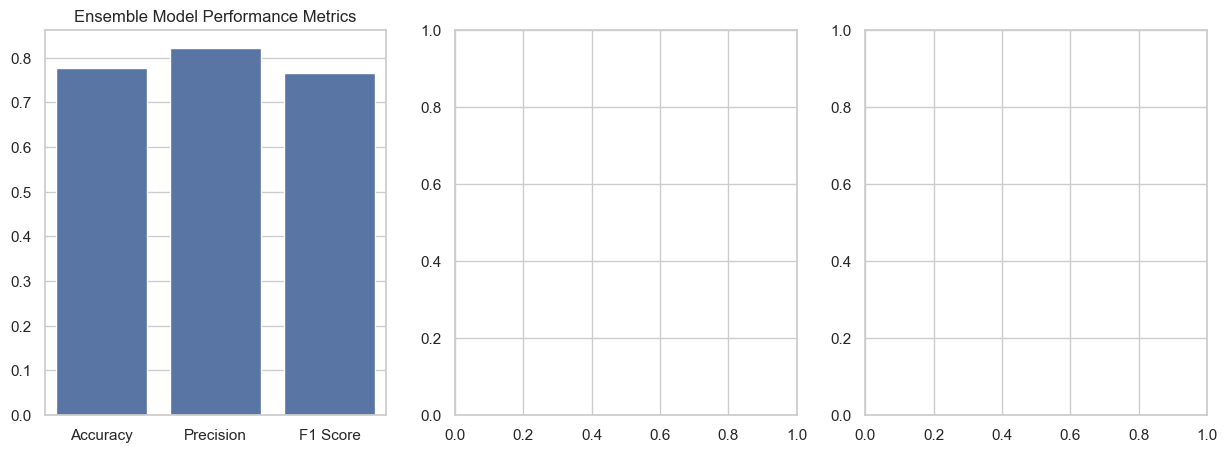

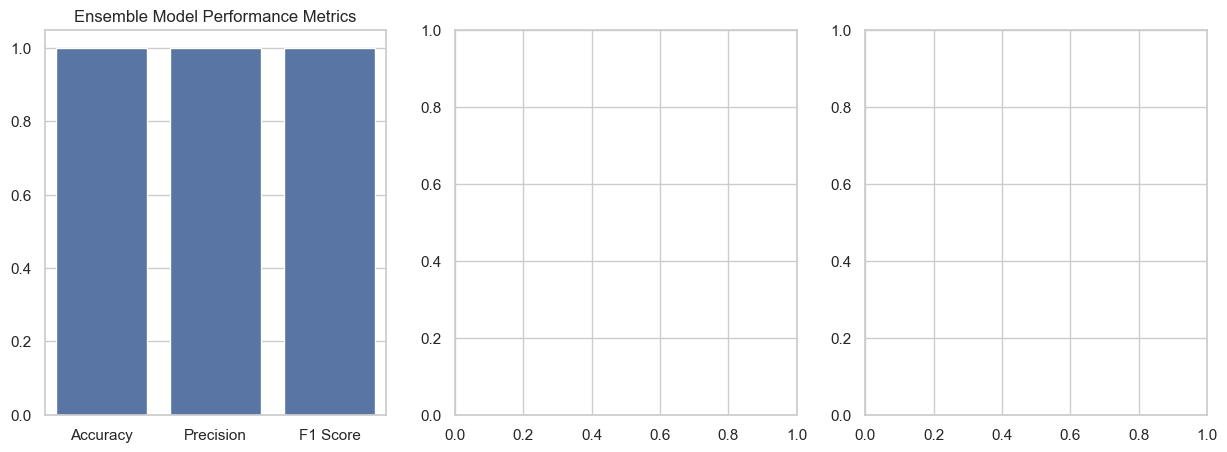

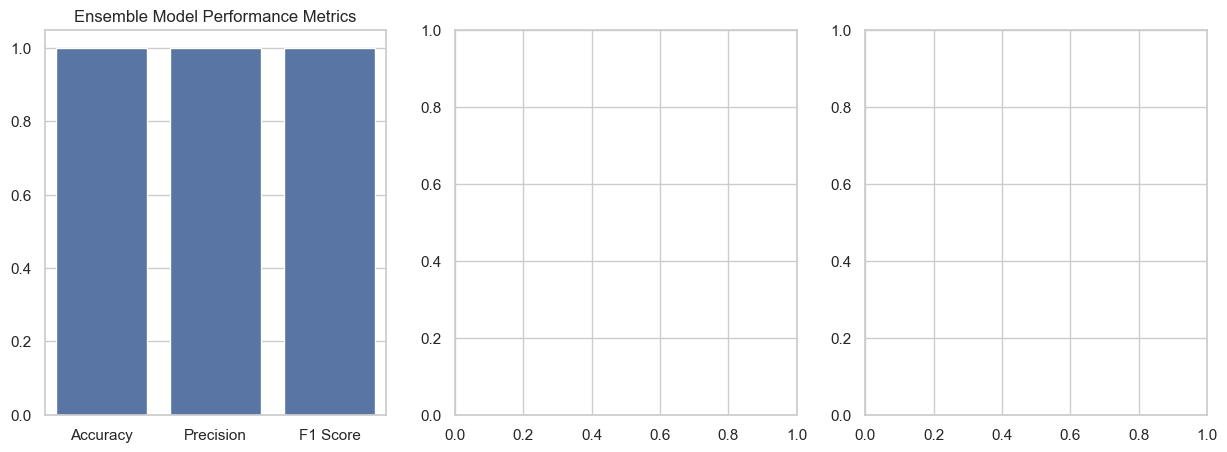

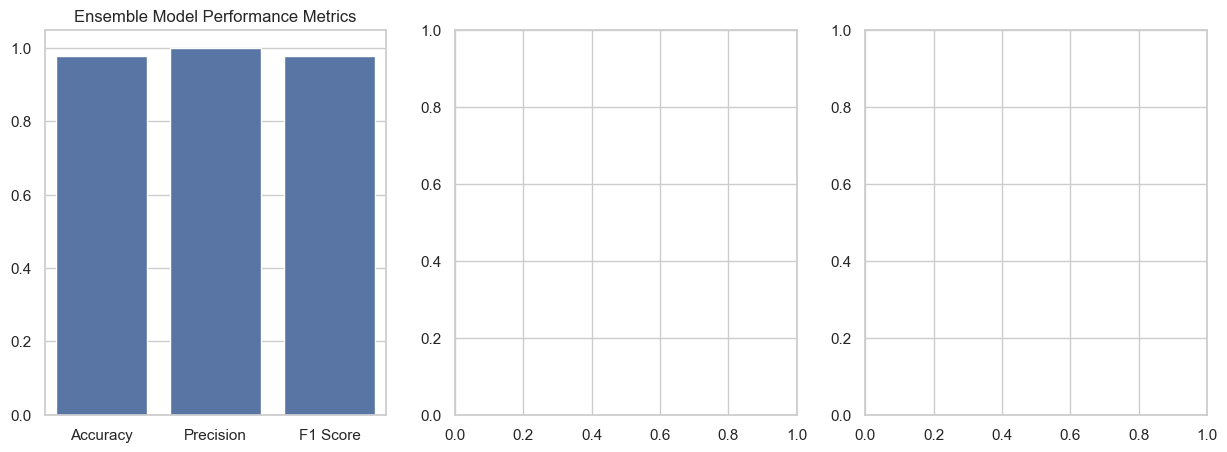

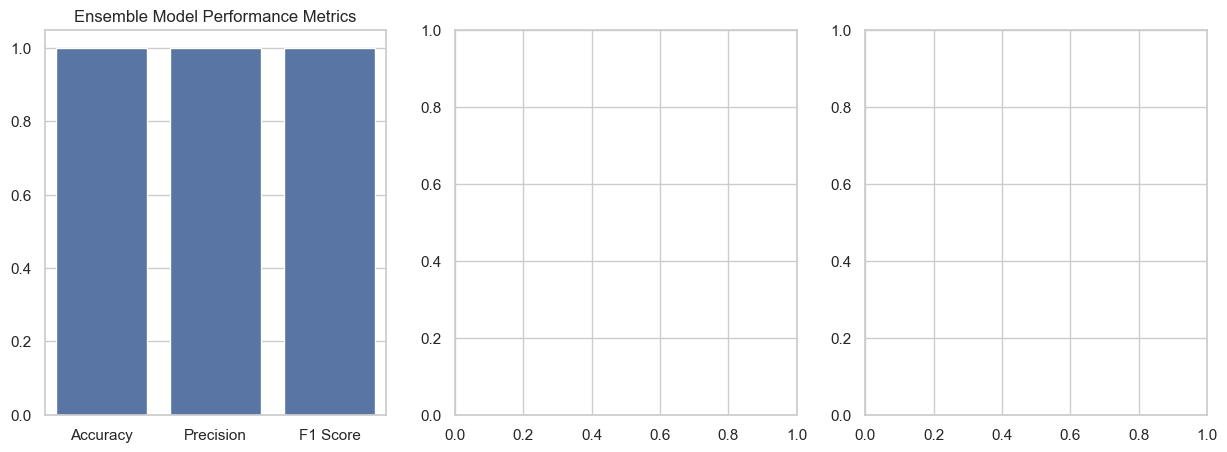

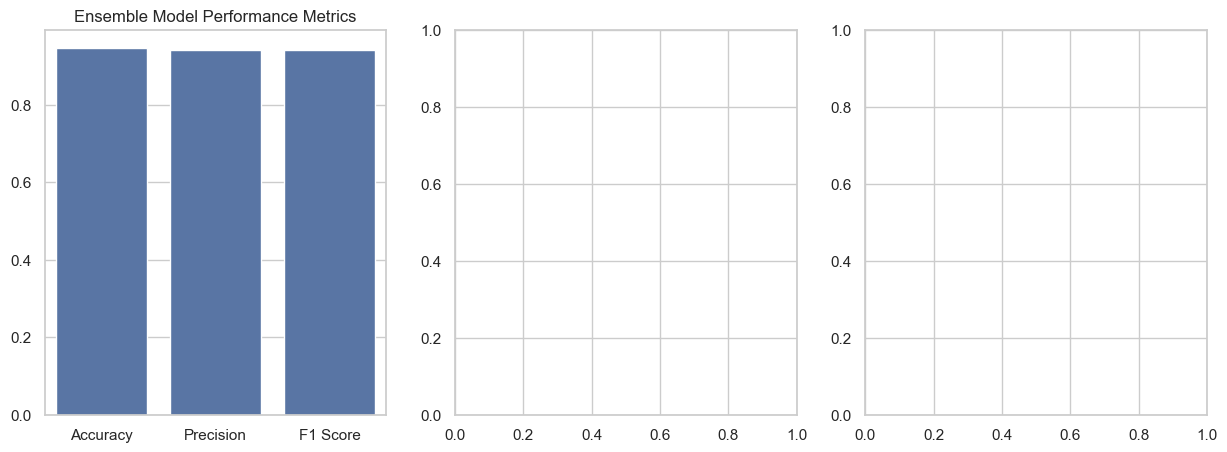

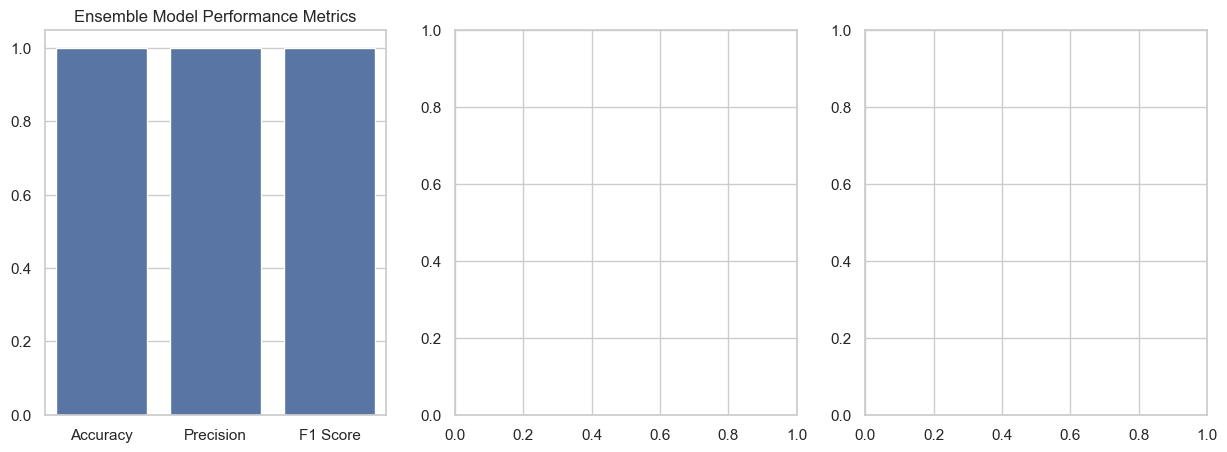

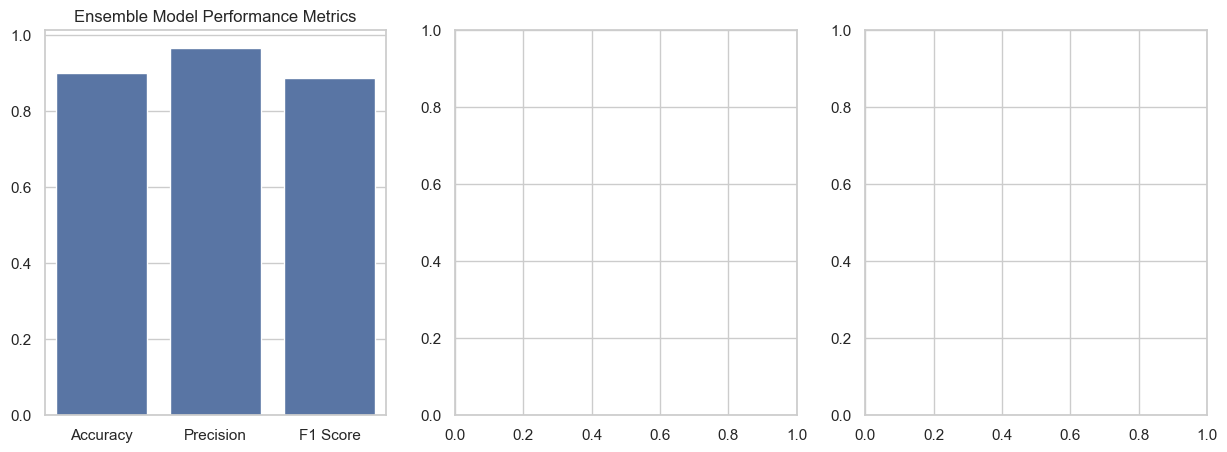

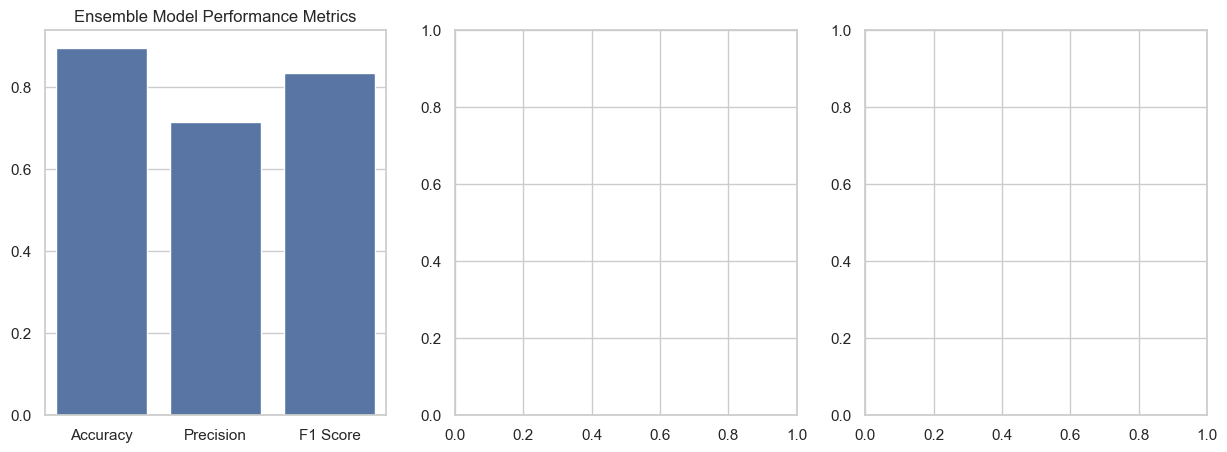

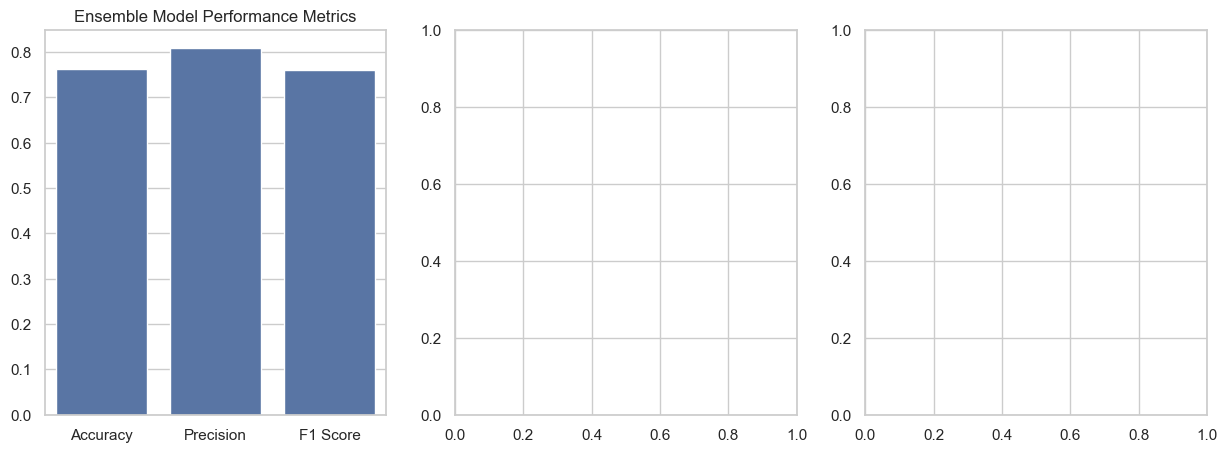

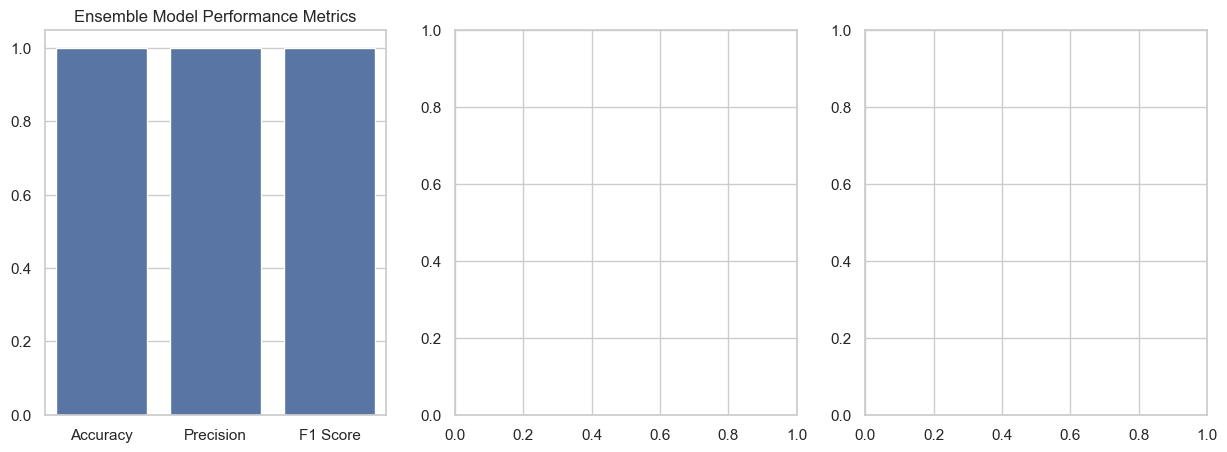

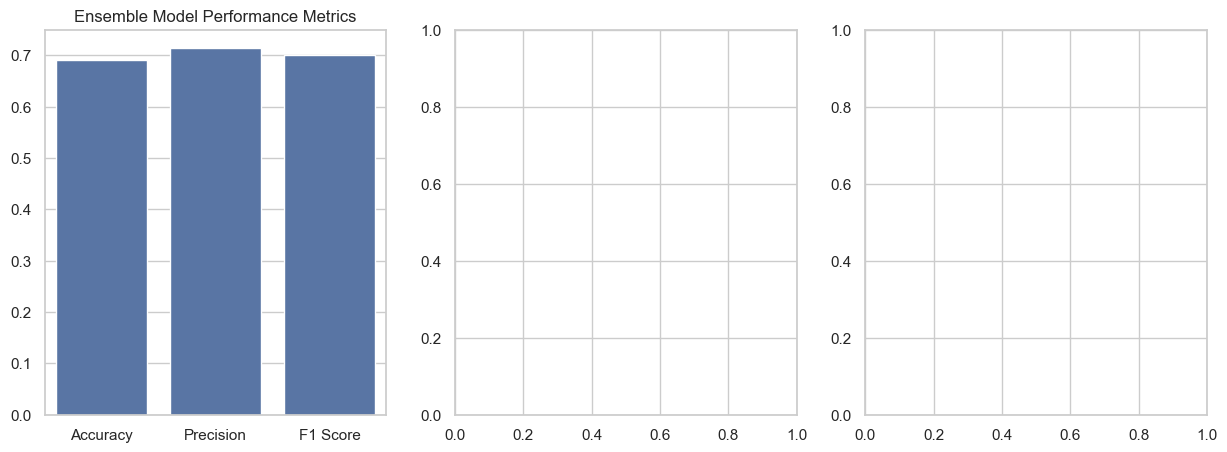

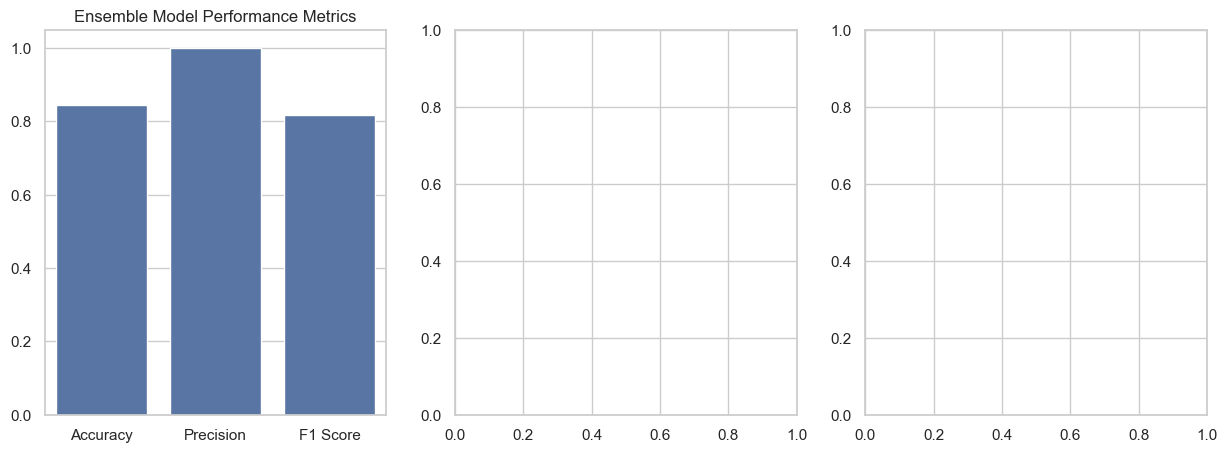

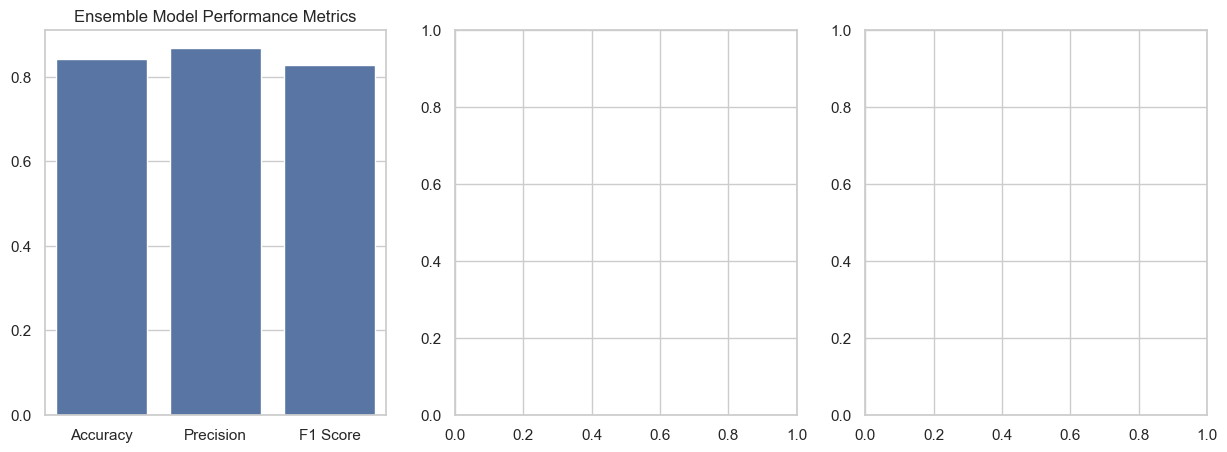

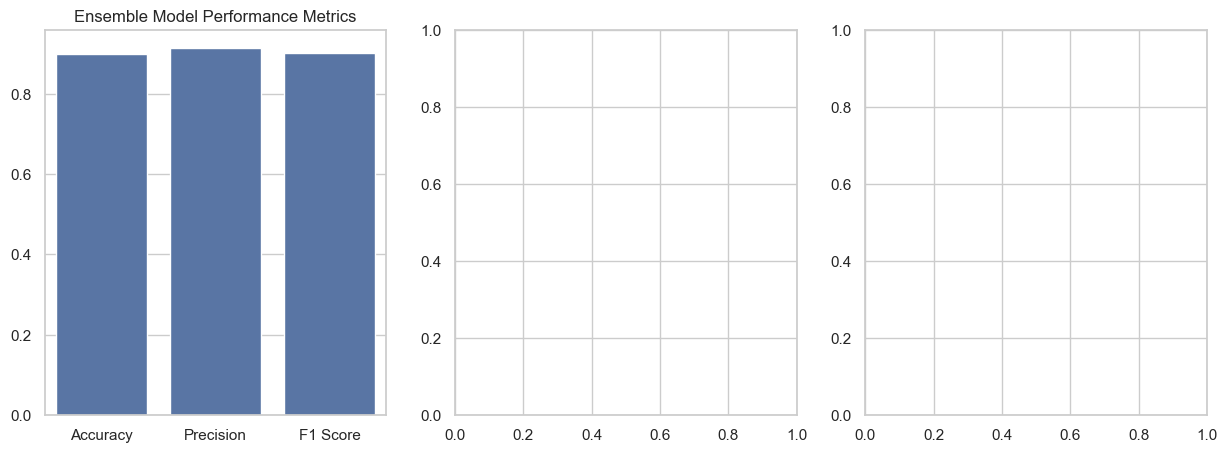

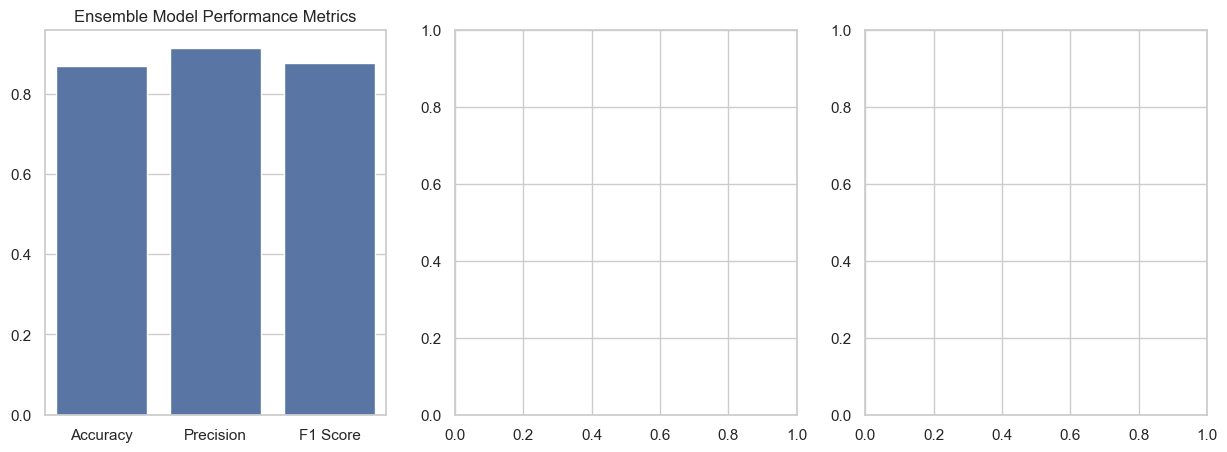

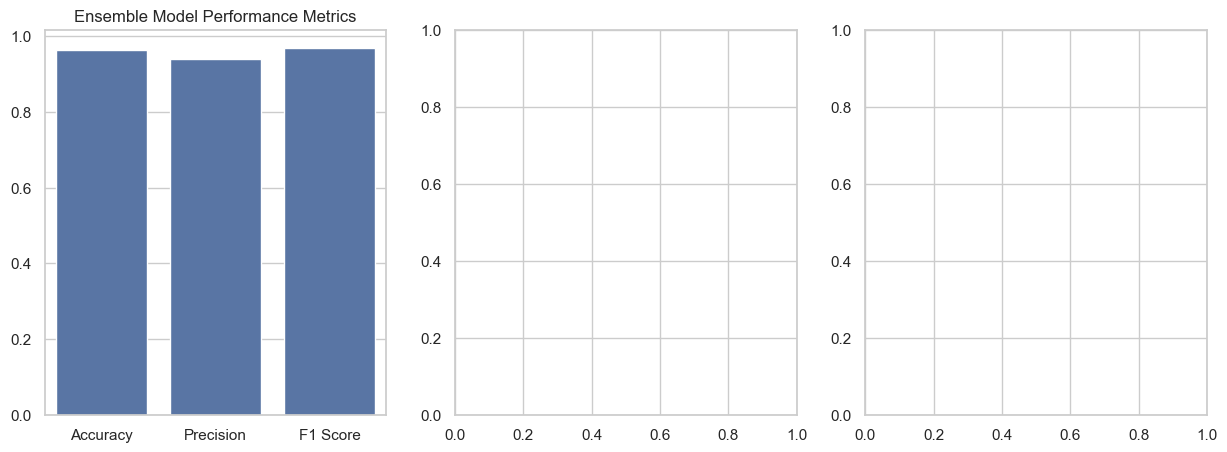

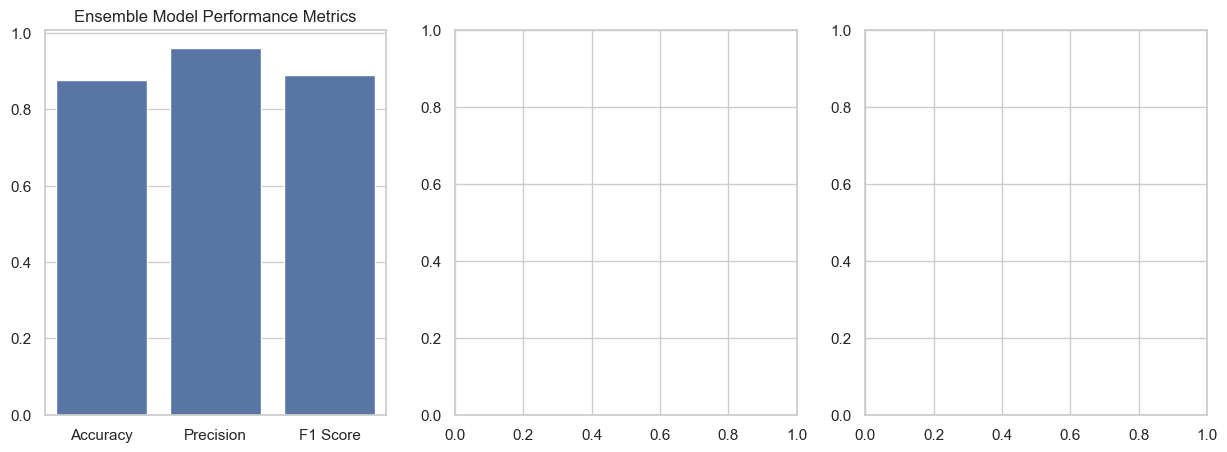

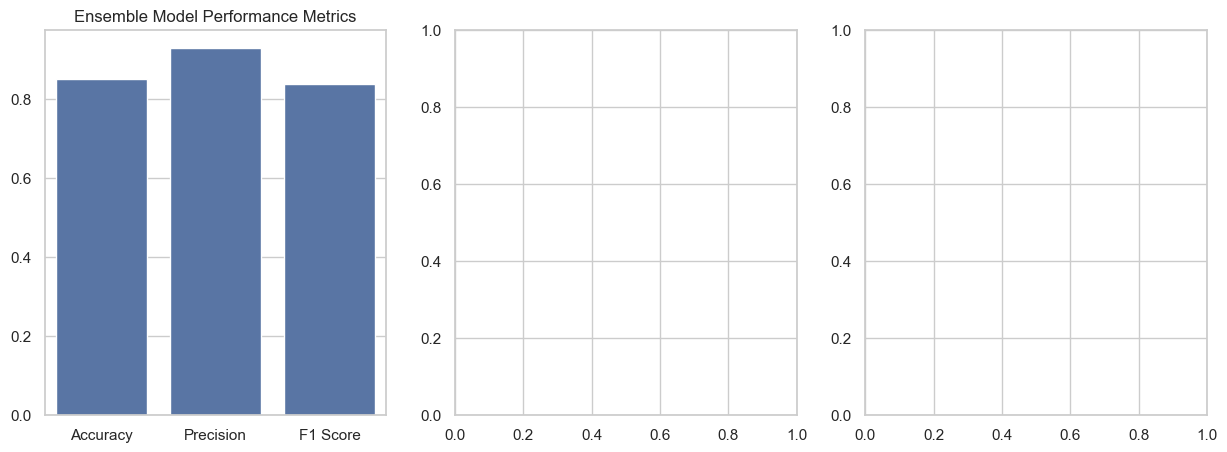

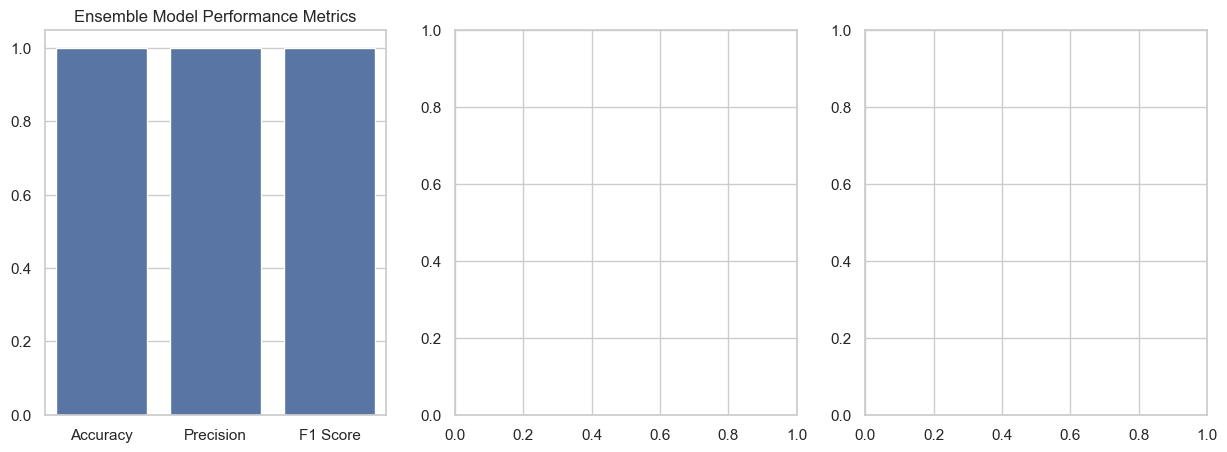

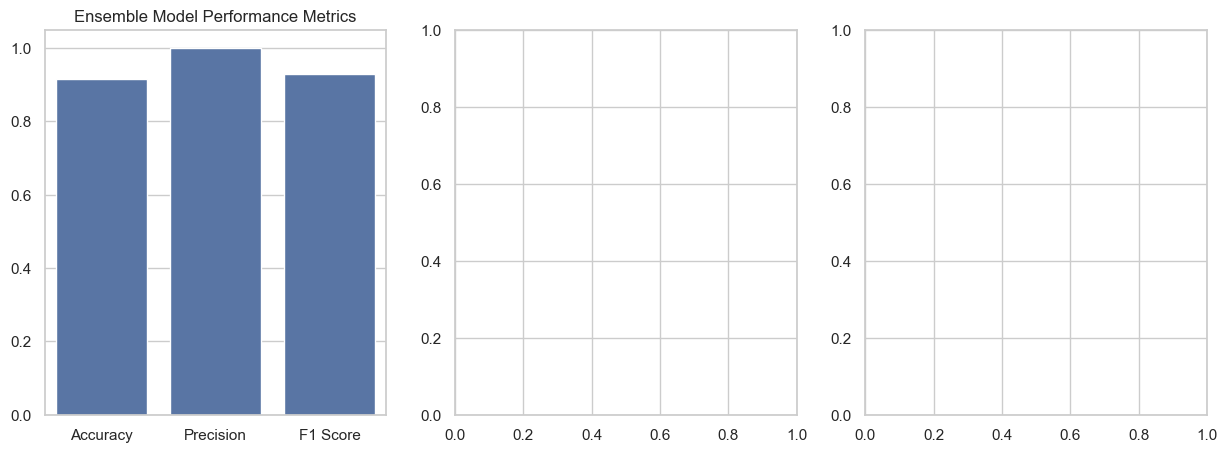

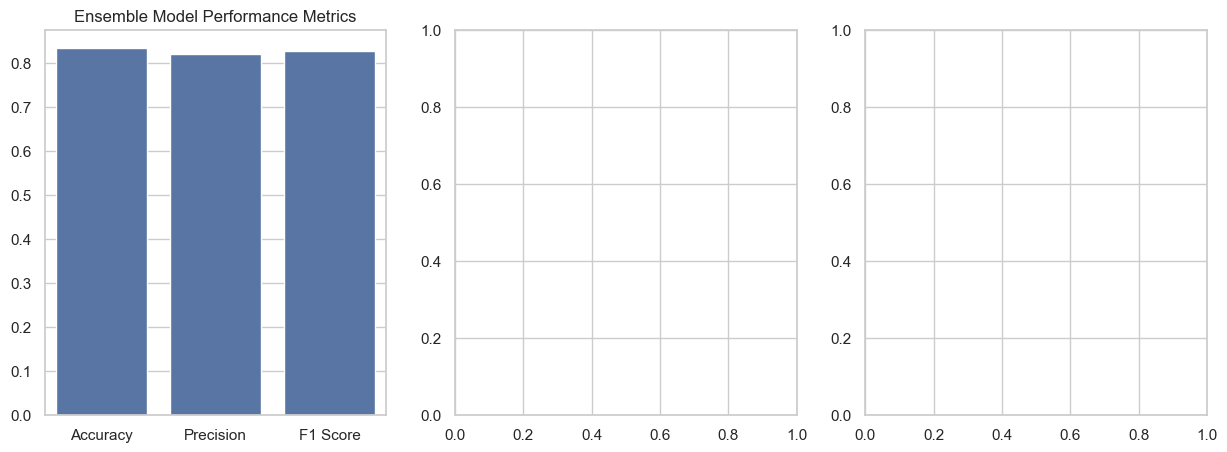

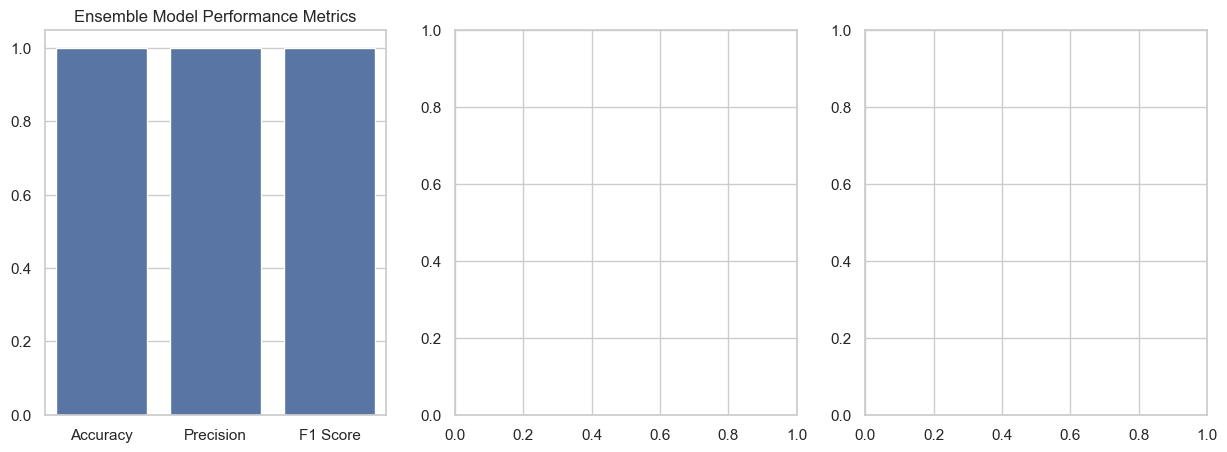

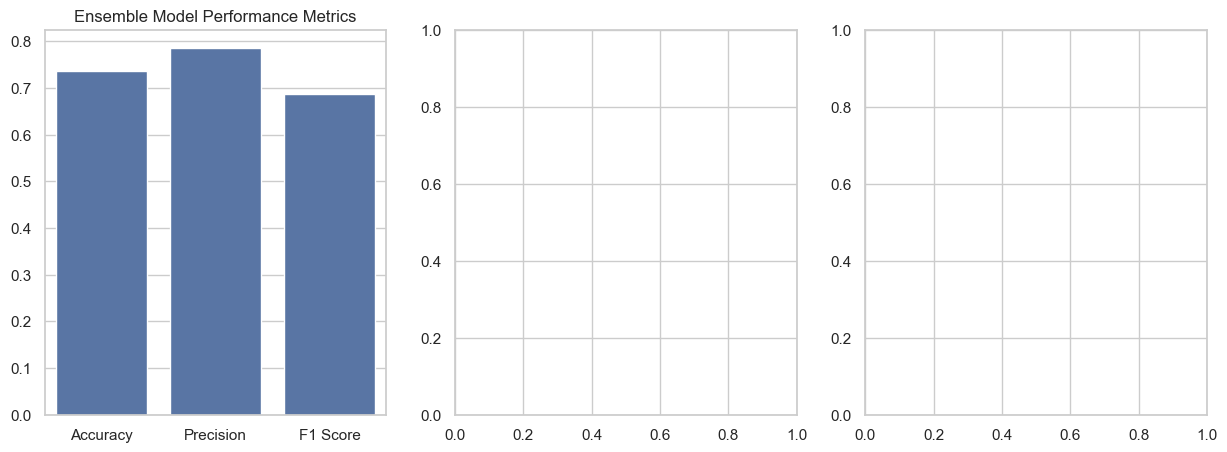

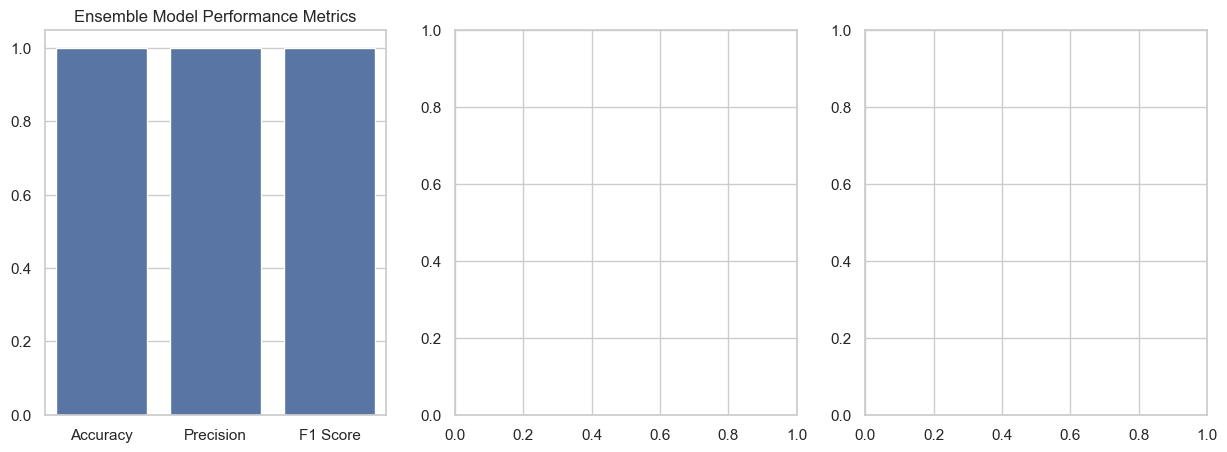

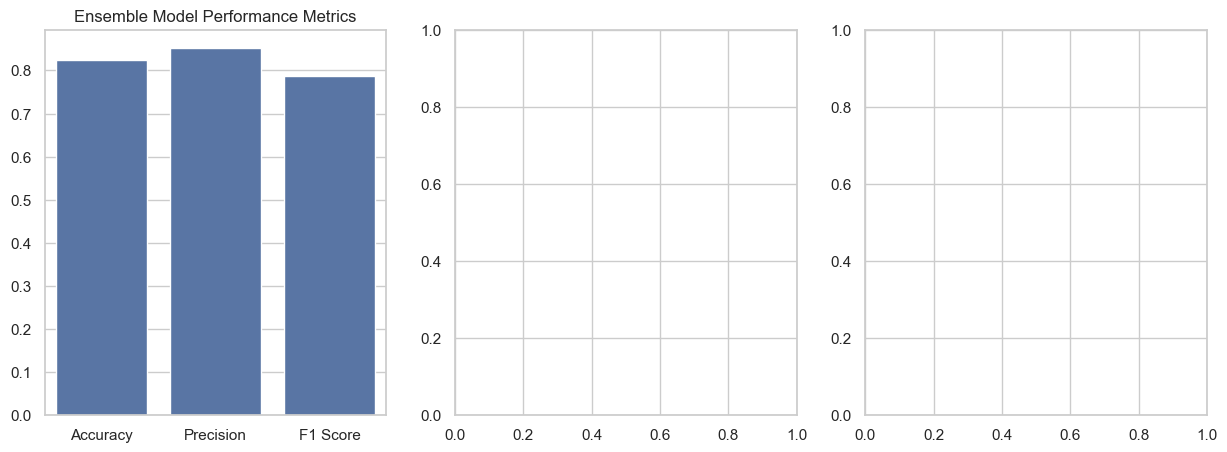

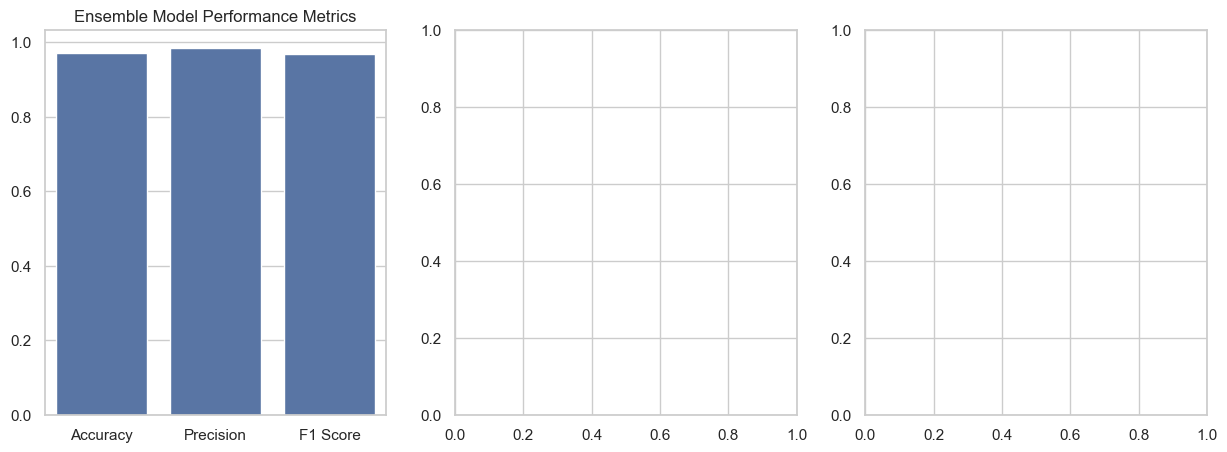

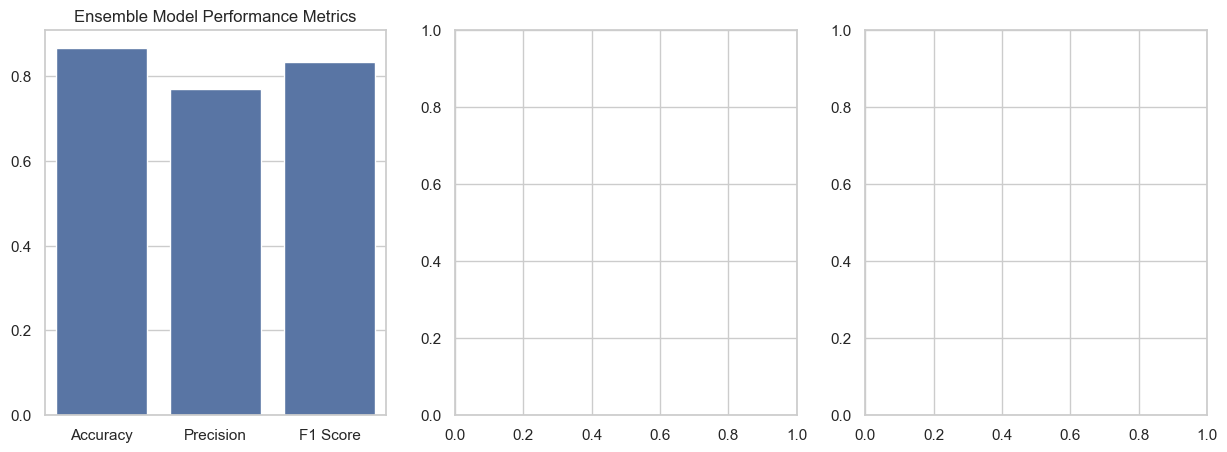

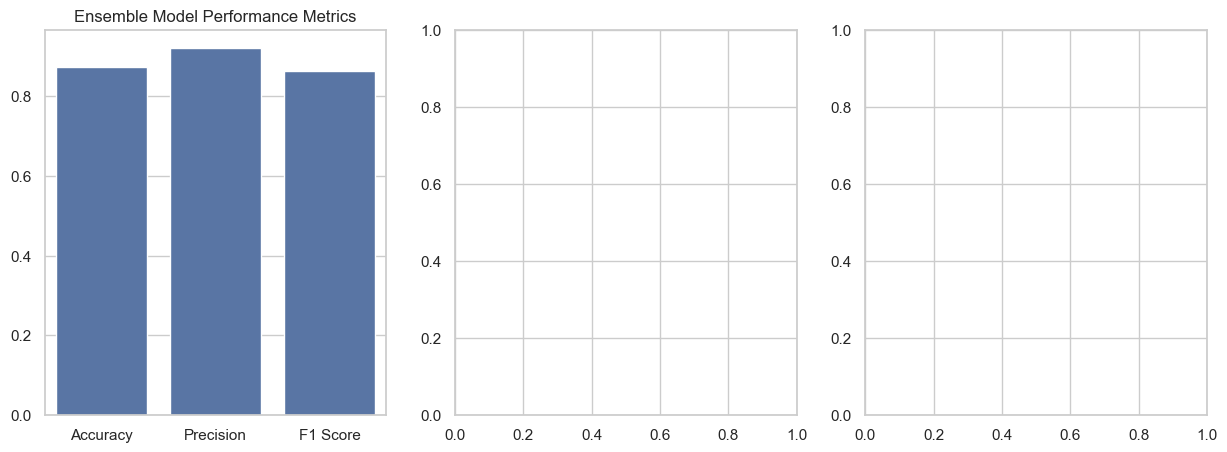

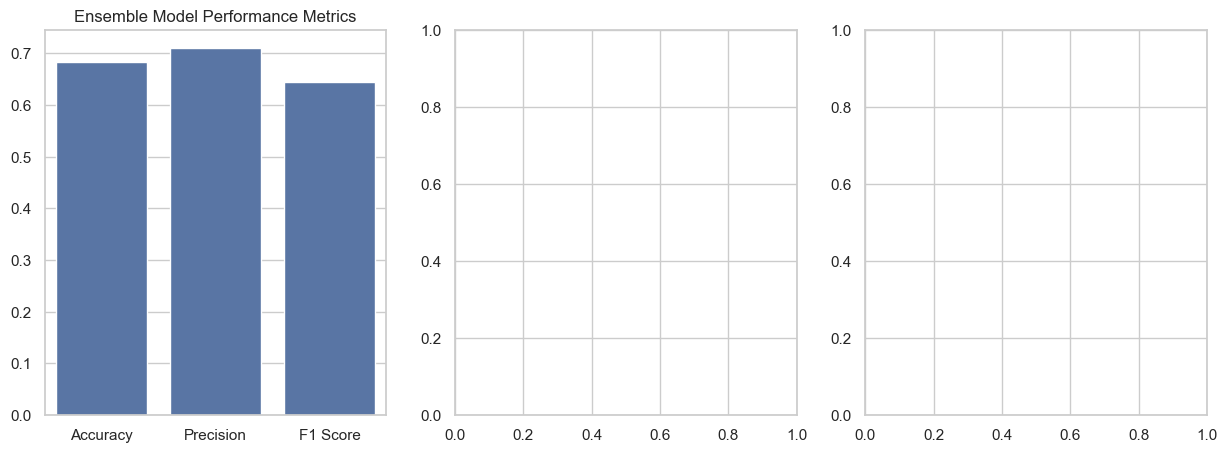

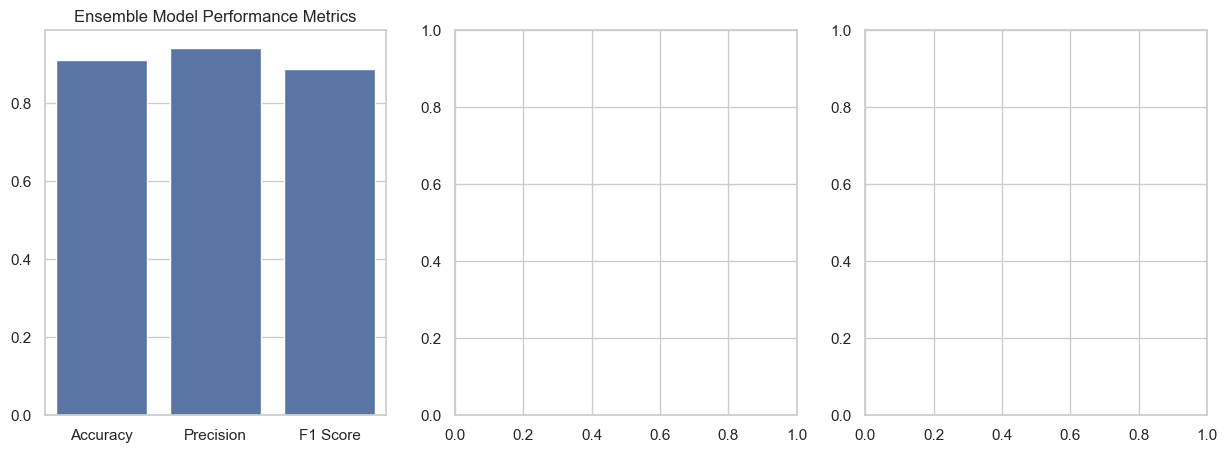

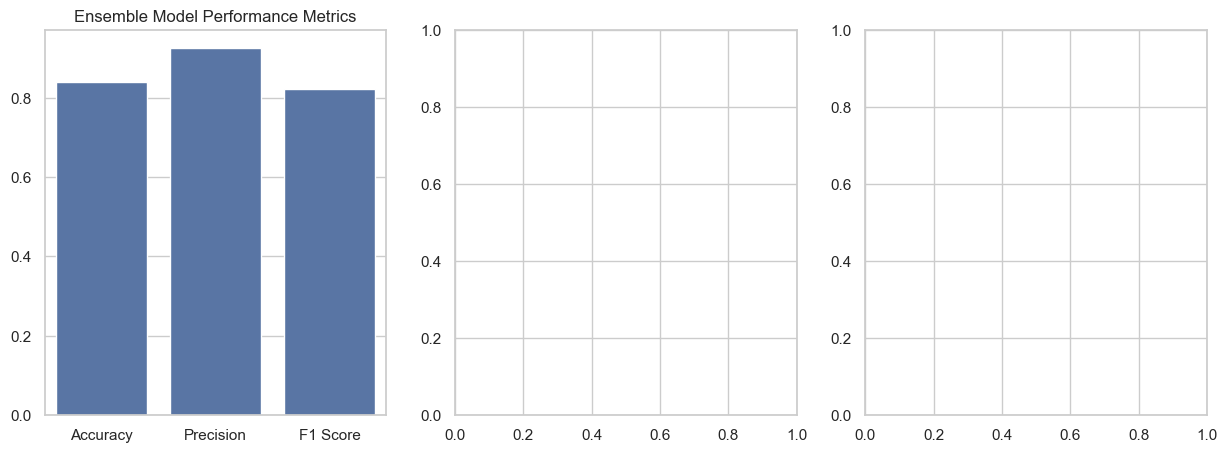

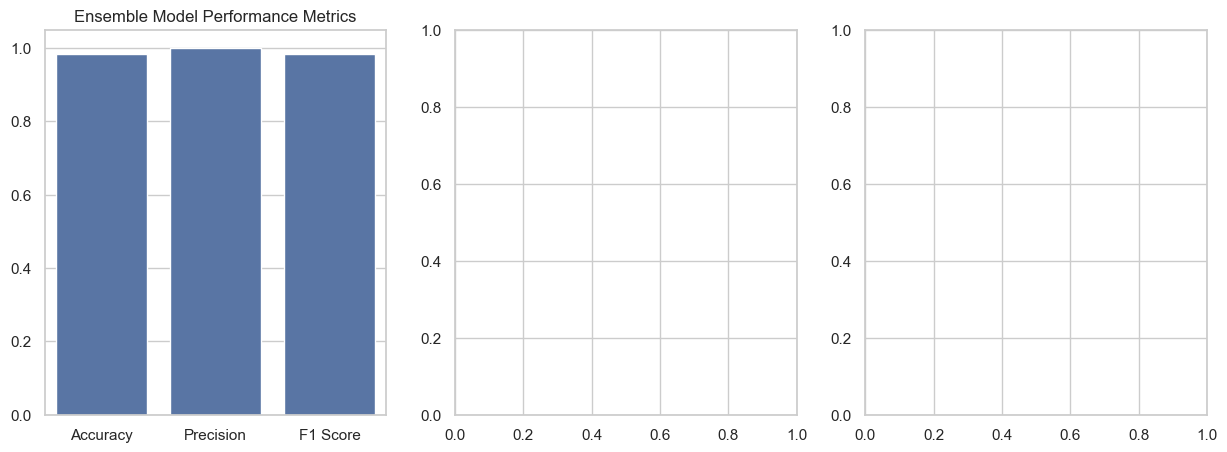

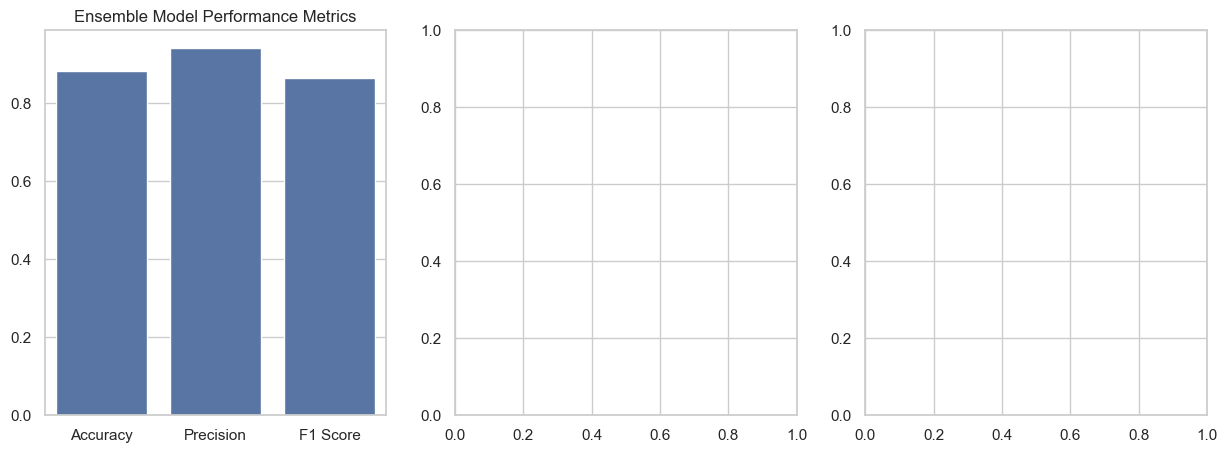

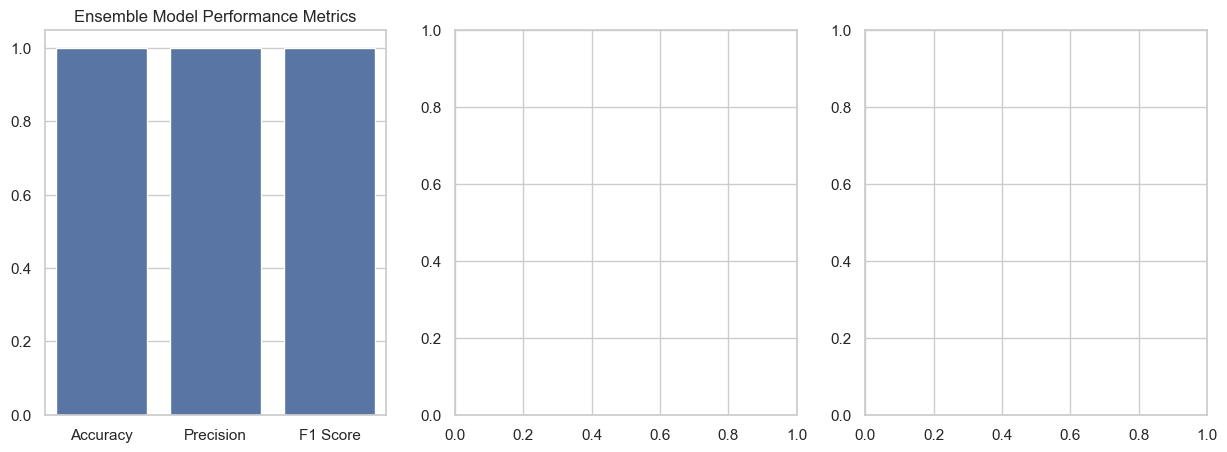

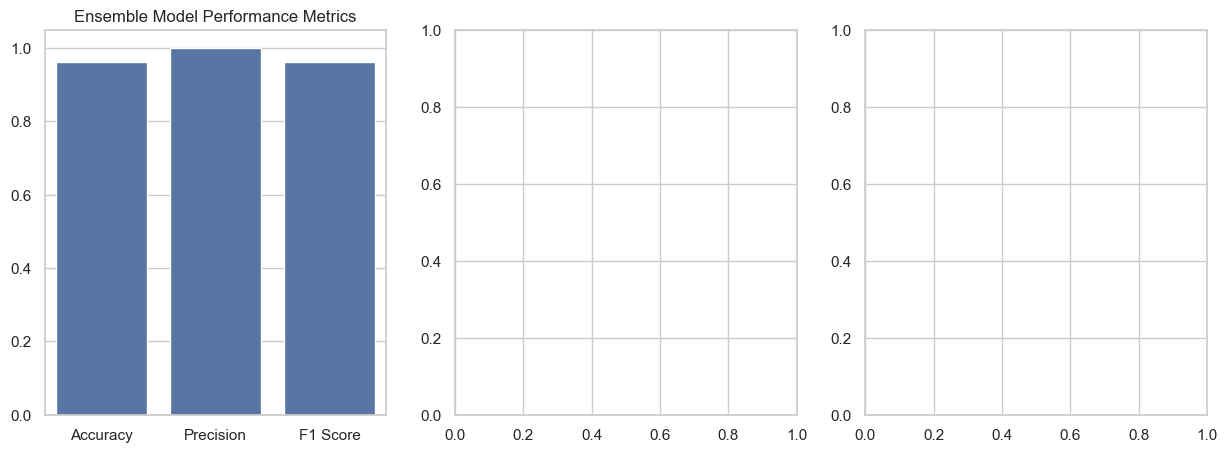

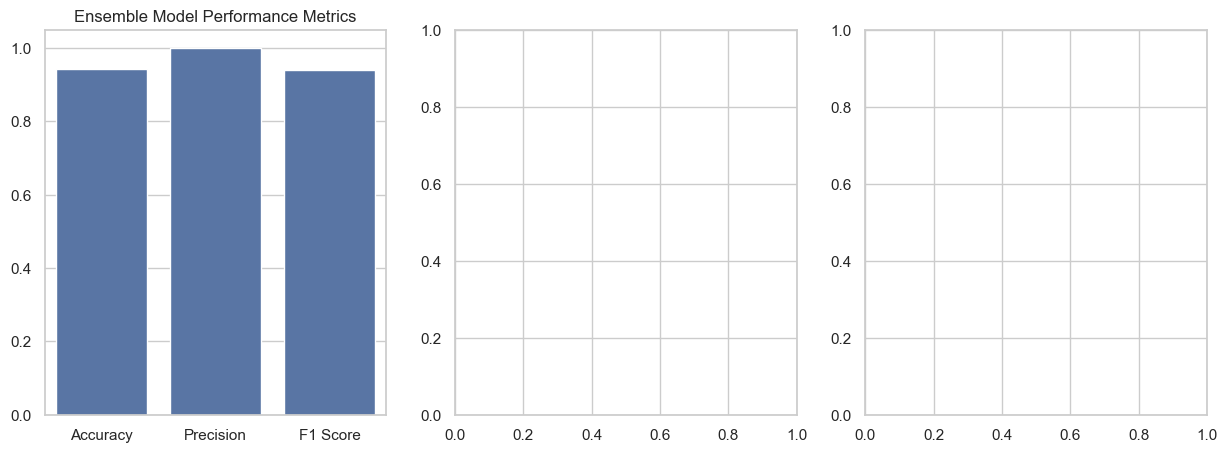

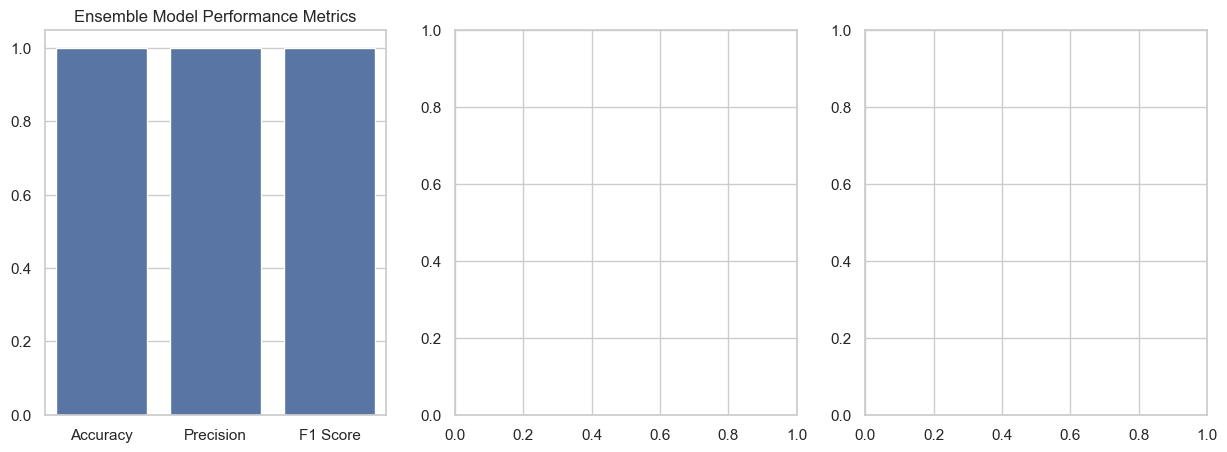

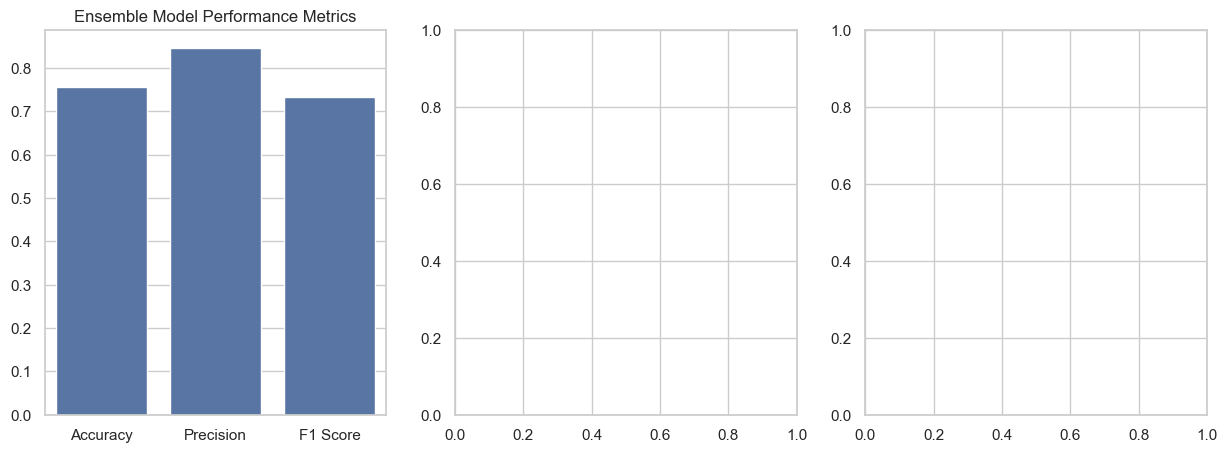

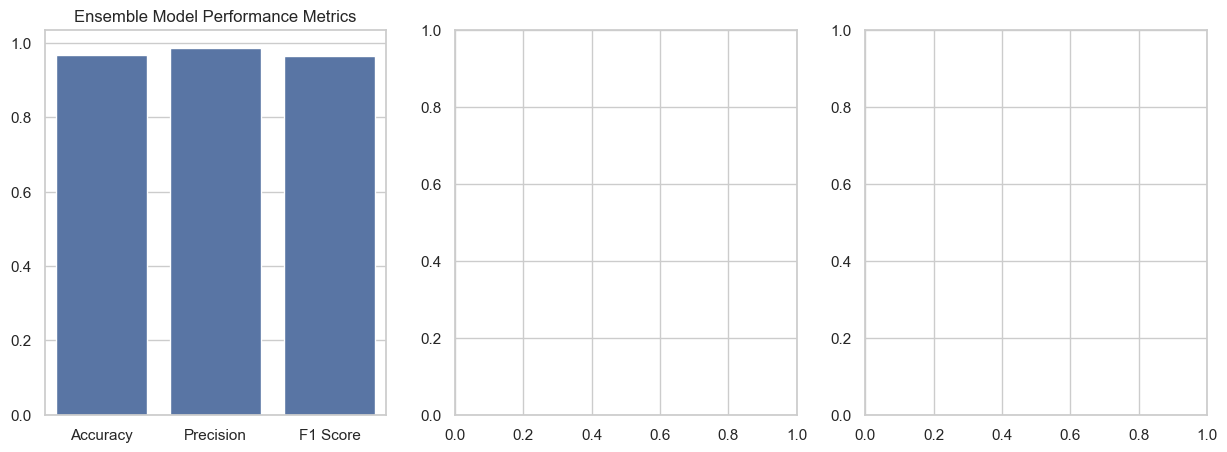

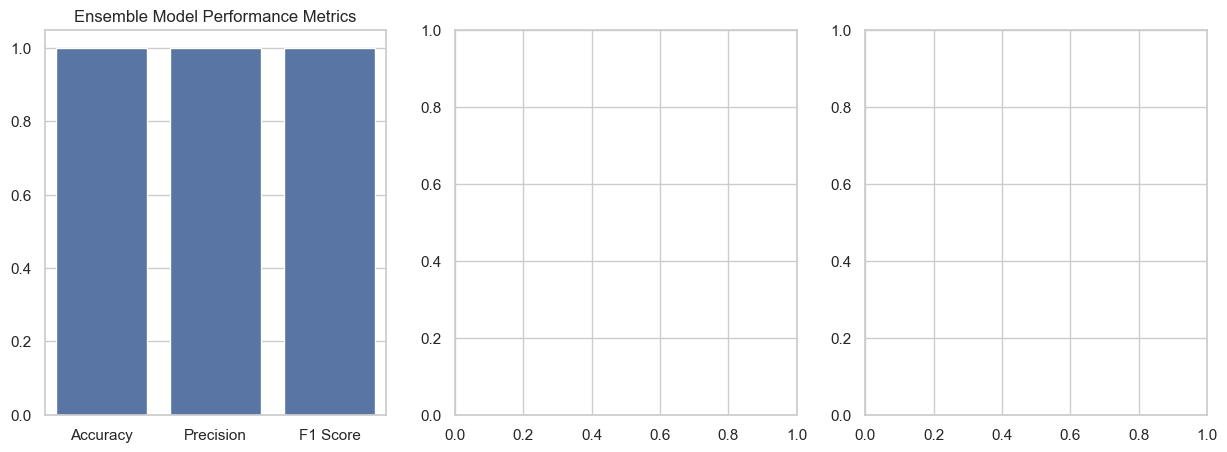

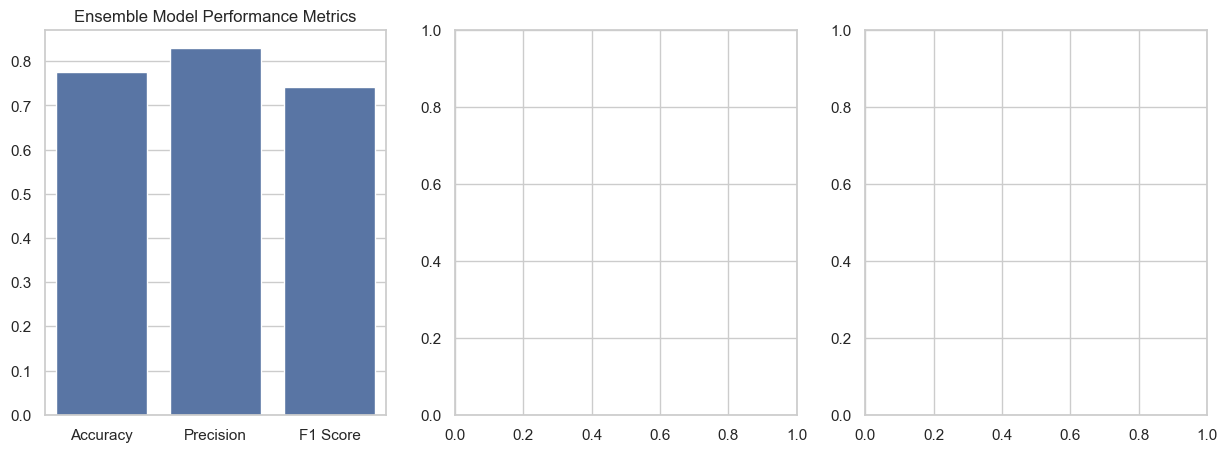

In [2]:

# Path to the data folder
data_folder = 'Competition_data'

# Function to preprocess data, train model, and save predictions
def process_dataset(dataset_path):
    print(f"Processing {dataset_path}...")
    X_train = pd.read_csv(dataset_path / 'X_train.csv')
    y_train = pd.read_csv(dataset_path / 'y_train.csv').squeeze()
    X_test = pd.read_csv(dataset_path / 'X_test.csv')
    
    # Handle missing values by filling with column means
    if X_train.isnull().any().any():
        X_train.fillna(X_train.mean(), inplace=True)
    if X_test.isnull().any().any():
        X_test.fillna(X_test.mean(), inplace=True)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Apply SMOTE for class imbalance handling
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Split training data for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

    # Expanded Hyperparameter tuning for RandomForest
    rf_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', 'balanced_subsample']
    }
    rf = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(rf, rf_params, scoring='f1', cv=5)
    rf_grid.fit(X_train_split, y_train_split)
    best_rf = rf_grid.best_estimator_

    # Expanded Hyperparameter tuning for XGBoost without early stopping in GridSearchCV
    xgb_params = {
        'n_estimators': 300, # Use the maximum number for early stopping to take effect
        'learning_rate': 0.1,
        'max_depth': 5,
        'eval_metric': 'logloss'
    }
    # Convert data to DMatrix format for xgb.train()
    dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
    dval = xgb.DMatrix(X_val, label=y_val)

    # Train XGBoost with early stopping
    best_xgb = xgb.train(
        params=xgb_params,
        dtrain=dtrain,
        num_boost_round=300,
        evals=[(dval, 'validation')],
        early_stopping_rounds=10,
        verbose_eval=False
    )

    # Predict function for XGBoost with DMatrix
    def xgb_predict(model, X):
        dX = xgb.DMatrix(X)
        return (model.predict(dX) > 0.5).astype(int)

    # Ensemble Model Evaluation (Average predictions from Random Forest and XGBoost)
    rf_val_pred = best_rf.predict(X_val)
    xgb_val_pred = xgb_predict(best_xgb, X_val)
    ensemble_val_pred = np.round((rf_val_pred + xgb_val_pred) / 2).astype(int)

    # Evaluate Ensemble model
    ensemble_accuracy = accuracy_score(y_val, ensemble_val_pred)
    ensemble_precision = precision_score(y_val, ensemble_val_pred, zero_division=0)
    ensemble_f1 = f1_score(y_val, ensemble_val_pred, zero_division=0)
    ensemble_score = ensemble_accuracy * 0.3 + ensemble_precision * 0.4 + ensemble_f1 * 0.3

    print(f"Ensemble Model Validation Score for {dataset_path}: Accuracy={ensemble_accuracy:.3f}, Precision={ensemble_precision:.3f}, F1 Score={ensemble_f1:.3f}, Score={ensemble_score:.3f}")

    # Visualize results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.barplot(x=['Accuracy', 'Precision', 'F1 Score'], y=[ensemble_accuracy, ensemble_precision, ensemble_f1], ax=ax[0])
    ax[0].set_title("Ensemble Model Performance Metrics")

    # Inference on test set using Ensemble model
    rf_test_pred = best_rf.predict(X_test)
    xgb_test_pred = xgb_predict(best_xgb, X_test)
    ensemble_test_pred = np.round((rf_test_pred + xgb_test_pred) / 2).astype(int)

    # Save predictions
    pd.DataFrame(ensemble_test_pred, columns=['prediction']).to_csv(dataset_path / 'y_predict.csv', index=False)

# Run the function for each dataset
dataset_paths = [Path(data_folder) / d for d in os.listdir(data_folder) if d.startswith("Dataset")]
for dataset_path in dataset_paths:
    process_dataset(dataset_path)
